fft start
fft end


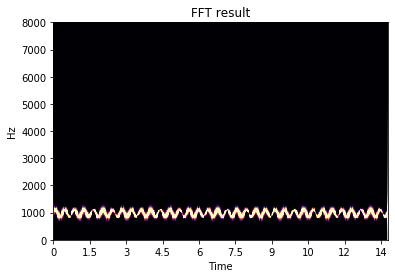

In [4]:
# http://code.activestate.com/recipes/578180-random-sound-fx-using-wav-file/
# Random Sound FX Using WAV File
# http://en.wikipedia.org/wiki/Amplitude_modulation
# http://en.wikipedia.org/wiki/Frequency_modulation
# FB36 - 20120701
import math, wave, array, random

def fft_fft():
    duration = 5 # seconds
    volume = 100 # percent
    freqCR = random.randint(500, 3000) # frequency of the carrier wave (Hz)
    freqAM = random.randint(1, 10) # frequency of the AM wave (Hz)
    freqFM = random.randint(1, 10) # frequency of the FM wave (Hz) 
    freqFMDev = random.randint(100, 400) # frequency deviation for FM (Hz) 
    phaseCR = random.random() * math.pi * 2
    phaseAM = random.random() * math.pi * 2
    phaseFM = random.random() * math.pi * 2
    # Assumed: ampCR = ampAM = ampFM = 1
    data = array.array('h') # signed short integer (-32768 to 32767) data
    dataSize = 2 # 2 bytes because of using signed short integers => bit depth = 16
    numChan = 1 # of channels (1: mono, 2: stereo)
    sampleRate = 44100 # of samples per second (standard)
    numSamples = sampleRate * duration
    # nSPC: number of Samples Per Cycle
    nSPCCR = int(sampleRate / freqCR)
    nSPCAM = int(sampleRate / freqAM)
    nSPCFM = int(sampleRate / freqFM)
    for i in range(numSamples):
        sample = 32767 * float(volume) / 100
        tCR = math.pi * 2 * (i % nSPCCR) / nSPCCR + phaseCR
        tFM = math.pi * 2 * (i % nSPCFM) / nSPCFM + phaseFM
        tAM = math.pi * 2 * (i % nSPCAM) / nSPCAM + phaseAM
        sample *= math.sin(tCR + math.sin(tFM) * freqFMDev / freqFM)
        sample *= (math.sin(tAM) + 1) / 2
        data.append(int(sample))
    f = wave.open('RndSoundFX.wav', 'w')
    f.setparams((numChan, dataSize, sampleRate, numSamples, "NONE", "Uncompressed"))
    f.writeframes(data.tostring())
    f.close()

fft_fft()
# Original text ling: https://m.blog.naver.com/PostView.nhn?blogId=gaechuni&logNo=221649637954&proxyReferer=https%3A%2F%2Fwww.google.com%2F
# wav 파일을 읽어서 FFT를 수행하는 함수 코드
# 512샘플만큼 오버랩하여 1024 FFT를 수행하는 코드이다.
# FFT의 결과를 스펙트럼이라 하고, 이 결과를 시간적으로 나열한 것을 스펙트로그램이라 한다.
import scipy.signal as signal
import math
import librosa
import numpy as np
import os 
import os.path
import numpy

def wav_fft(file_name):
    print("fft start")
    audio_sample, sampling_rate = librosa.load(file_name, sr = None)
    fft_result = librosa.stft(audio_sample, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann).T
    mag, phase = librosa.magphase(fft_result)
    print("fft end")
    return mag

# dB scale을 신호로 변환시키는 것
# 소리 신호를 0~1 구간으로 normalization 시켜주는 것: nolmalization: 정규화: 데이터 범위를 0과 1로 변환하여 
                                                     # 데이터 분포를 조정하는 절차

    
# normalize_funtion
min_level_db = -100
def _normalize(S):
    return np.clip((S-min_level_db)/(-min_level_db), 0, 1)


mag = wav_fft("RndSoundFX.wav")
mag_db = librosa.amplitude_to_db(mag)
mag_n = _normalize(mag_db)
S = numpy.log(1 + mag * 1000) # 로그형태로 변환합니다. // 삭제해도 무방
sampling_rate = 16000 # 샘플링 레이트 정의 원본에서 삐져있어서 추가했더니 실행됨
                      # 100이나 16000이나 차이가 없음
    
import matplotlib.pyplot as plt
import librosa.display

# 아래 'time' 이후로 sr=sampling_rate를 이어서 써야 하는데 이 항목이 정의되지 않았다고 한다.
# 삭제 후 실행하면 된다.
librosa.display.specshow(mag_n.T, y_axis='linear', x_axis='time', sr=sampling_rate)
plt.title('FFT result')
# plt.show는 삭제하지 않아도 pdf 파일로 출력됨
plt.show

# 아래 그림과 D드라이브\IVH연구소_FFT_학습자료\jupyter_20200303(화)_FFT_USING_AUDIO_SAMPLE_FILE_관련자료의
# 원본 사진을 비교해 보자 원본 사진에는 큰 형태가 3개가 있지만 아래에는 4개가 보인다.
# 원본에서는 진폭을 나타낸 것이고 아래는 주파수를 나타낸 것이다. 소리의 크기에는 진폭이 관여하므로
# 아래그림에서처럼 주파수가 4개가 나타나는 것이 맞다
# 원본을 녹음할 때 초반 도입 부분은 기타 잡음이 녹음된 것 같은데 소리는 작더라고 최대 주파수가
# 6000Hz는 될 것으로 보인다. 끝.

plt.savefig("C:/Users/RD_PC/Documents/20200305FFT/20200305.pdf",bbox_inches="tight",pad_inches=0.1, transparent=True)

# 정상작동 확인